🐱 Starting BCS Multi-View Classification Training...
🎯 Using improved splitting strategy to ensure all classes are tested!
📊 Loading dataset...
Total samples: 100
Samples with known BCS: 99

📈 BCS Distribution:
bcs_score
2.0     2
3.0    16
4.0    16
5.0    36
6.0    18
7.0     4
8.0     2
9.0     3
Name: count, dtype: int64

📊 After filtering classes with <2 samples: 97 samples
Final BCS distribution:
bcs_score
2.0     2
3.0    16
4.0    16
5.0    36
6.0    18
7.0     4
8.0     2
9.0     3
Name: count, dtype: int64

🖼️ Loading multi-view images...
✅ Successfully loaded 30 complete multi-view samples
Top view shape: (30, 224, 224, 3)
Back view shape: (30, 224, 224, 3)
Left view shape: (30, 224, 224, 3)
Right view shape: (30, 224, 224, 3)

🏷️ Unique BCS values: [2. 3. 4. 5. 6. 7. 9.]
Class distribution: {7.0: 2, 6.0: 5, 5.0: 12, 3.0: 5, 9.0: 2, 4.0: 3, 2.0: 1}

🎯 Creating stratified split with guaranteed test coverage...
Target test size: 20.0%, Minimum test samples per class: 1
Classes

33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 160ms/step - accuracy: 0.2590 - loss: 2.1039 - val_accuracy: 0.2857 - val_loss: 2.3440 - learning_rate: 1.0000e-04
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.3465 - loss: 1.8274
Epoch 2: val_loss improved from 2.34404 to 2.17411, saving model to best_bcs_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.3472 - loss: 1.8275 - val_accuracy: 0.2857 - val_loss: 2.1741 - learning_rate: 1.0000e-04
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.3784 - loss: 1.6571
Epoch 3: val_loss did not improve from 2.17411
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.3786 - loss: 1.6573 - val_accuracy: 0.2857 - val_loss: 2.5426 - learning_rate: 1.0000e-04
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.4852 - loss: 1.6069
Epoch 4: val_loss did not improve from 2.17411
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.4838 - loss: 1.6072 - val_accuracy: 0.2857 - val_loss: 2.3082 - learning_rate: 1.0000e-04
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.4567 - loss: 1.5926
Epoch 5: val_loss improved from 2.17411 to 2.12936, saving model to best_bcs_model.h5


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 130ms/step - accuracy: 0.4573 - loss: 1.5913 - val_accuracy: 0.2857 - val_loss: 2.1294 - learning_rate: 1.0000e-04
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.4321 - loss: 1.4754
Epoch 6: val_loss did not improve from 2.12936
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.4336 - loss: 1.4740 - val_accuracy: 0.2857 - val_loss: 2.3160 - learning_rate: 1.0000e-04
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.4111 - loss: 1.4945
Epoch 7: val_loss did not improve from 2.12936
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - accuracy: 0.4121 - loss: 1.4942 - val_accuracy: 0.2857 - val_loss: 2.7125 - learning_rate: 1.0000e-04
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.4114 - loss: 1.5469
Epoch 8: val_loss did not improve from 2.12936
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 0.4124 - loss: 1.5443 - val_accuracy: 0.2857 - val_loss: 2.8070 - learning_rate: 1.0000e-04
Epoch 9/50
33/33 ━━━━

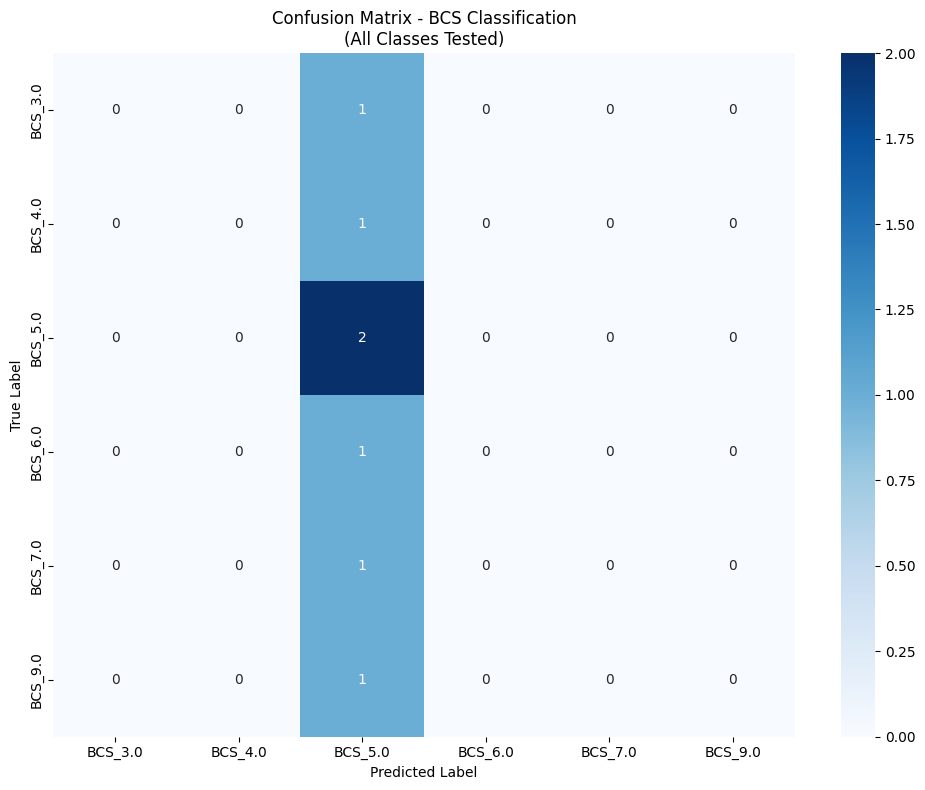

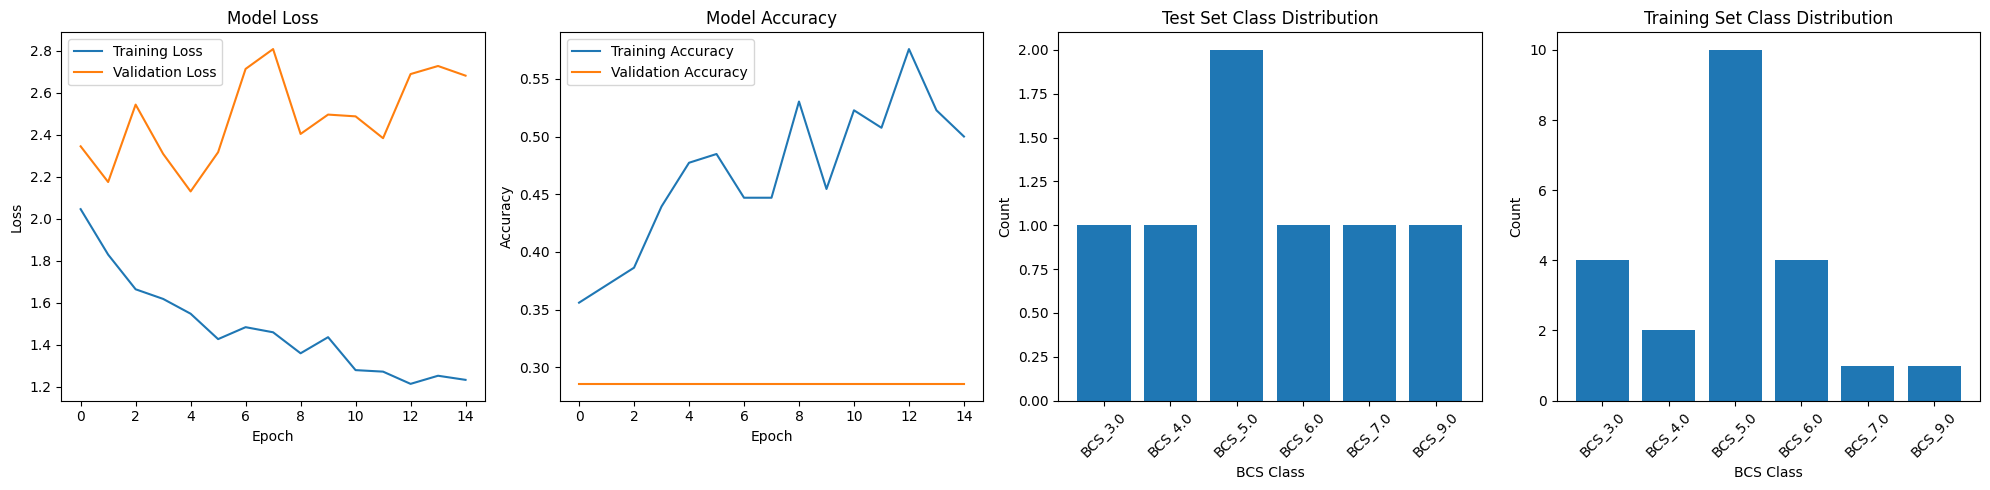


🎉 Training completed! Final accuracy: 0.2857
📁 Model saved as 'best_bcs_model.h5'
📊 Confusion matrix saved as 'confusion_matrix.png'
📈 Training results saved as 'training_results.png'
✅ All classes guaranteed to be in test set!


In [40]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Concatenate, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

class BCSDatasetPipeline:
    def __init__(self, json_path, images_folder, batch_size=4, img_size=224):
        self.json_path = json_path
        self.images_folder = images_folder
        self.batch_size = batch_size
        self.img_size = img_size
        self.label_encoder = LabelEncoder()
        
    def load_and_preprocess_data(self):
        """Load JSON data and preprocess"""
        print("📊 Loading dataset...")
        
        with open(self.json_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        df = pd.DataFrame(data)
        print(f"Total samples: {len(df)}")
        
        # Filter out samples with unknown BCS
        df_filtered = df[df['ค่า BCS (โปรดระบุเป็นตัวเลข)'] != 'ไม่ระบุ (ไม่ทราบ)'].copy()
        print(f"Samples with known BCS: {len(df_filtered)}")
        
        # Convert BCS to numeric
        df_filtered['bcs_score'] = pd.to_numeric(df_filtered['ค่า BCS (โปรดระบุเป็นตัวเลข)'])
        
        # Check BCS distribution
        print("\n📈 BCS Distribution:")
        bcs_counts = df_filtered['bcs_score'].value_counts().sort_index()
        print(bcs_counts)
        
        # Filter out classes with very few samples (< 2 samples)
        min_samples_per_class = 2
        valid_bcs_values = bcs_counts[bcs_counts >= min_samples_per_class].index
        df_filtered = df_filtered[df_filtered['bcs_score'].isin(valid_bcs_values)]
        
        print(f"\n📊 After filtering classes with <{min_samples_per_class} samples: {len(df_filtered)} samples")
        print("Final BCS distribution:")
        print(df_filtered['bcs_score'].value_counts().sort_index())
        
        return df_filtered
    
    def load_multi_view_images(self, df):
        """Load images from all 4 views"""
        print("\n🖼️ Loading multi-view images...")
        
        view_folders = {
            'top': 'Top View',
            'back': 'Back View', 
            'left': 'Left View',
            'right': 'Right View'
        }
        
        image_columns = {
            'top': 'ภาพด้านบน (Top View)',
            'back': 'ภาพด้านหลัง (Back View)',
            'left': 'ภาพด้านซ้าย (Left View)',
            'right': 'ภาพด้านขวา (Right View)'
        }
        
        all_images = {view: [] for view in view_folders.keys()}
        labels = []
        valid_indices = []
        
        for idx, row in df.iterrows():
            try:
                views_loaded = {}
                all_views_exist = True
                
                # Check if all view images exist
                for view, folder in view_folders.items():
                    filename = row[image_columns[view]]
                    if pd.isna(filename) or filename == '':
                        all_views_exist = False
                        break
                    
                    img_path = os.path.join(self.images_folder, folder, filename)
                    if not os.path.exists(img_path):
                        all_views_exist = False
                        break
                    
                    views_loaded[view] = img_path
                
                if all_views_exist:
                    # Load and preprocess all views
                    for view, img_path in views_loaded.items():
                        img = load_img(img_path, target_size=(self.img_size, self.img_size))
                        img_array = img_to_array(img) / 255.0
                        all_images[view].append(img_array)
                    
                    labels.append(row['bcs_score'])
                    valid_indices.append(idx)
                    
            except Exception as e:
                print(f"Error loading images for index {idx}: {e}")
                continue
        
        print(f"✅ Successfully loaded {len(labels)} complete multi-view samples")
        
        # Convert to numpy arrays
        for view in all_images.keys():
            all_images[view] = np.array(all_images[view])
            print(f"{view.capitalize()} view shape: {all_images[view].shape}")
        
        labels = np.array(labels)
        
        return all_images, labels
    
    def stratified_split_with_guaranteed_test_coverage(self, all_images, labels, test_size=0.2, min_test_per_class=1):
        """
        Custom split ensuring every class has at least min_test_per_class samples in test set
        """
        print(f"\n🎯 Creating stratified split with guaranteed test coverage...")
        print(f"Target test size: {test_size:.1%}, Minimum test samples per class: {min_test_per_class}")
        
        unique_labels = np.unique(labels)
        class_counts = Counter(labels)
        
        print(f"Classes found: {unique_labels}")
        print(f"Class distribution: {dict(class_counts)}")
        
        # Initialize arrays for train/test indices
        train_indices = []
        test_indices = []
        
        for class_label in unique_labels:
            # Get all indices for this class
            class_indices = np.where(labels == class_label)[0]
            n_class_samples = len(class_indices)
            
            # Calculate test samples for this class
            n_test = max(min_test_per_class, int(n_class_samples * test_size))
            n_test = min(n_test, n_class_samples - 1)  # Leave at least 1 for training
            
            # If class has very few samples, ensure we have at least 1 test sample
            if n_class_samples < 2:
                print(f"⚠️ Warning: Class {class_label} has only {n_class_samples} sample(s)")
                continue
            
            print(f"Class {class_label}: {n_class_samples} total, {n_test} test, {n_class_samples - n_test} train")
            
            # Randomly select test indices for this class
            np.random.shuffle(class_indices)
            test_indices.extend(class_indices[:n_test])
            train_indices.extend(class_indices[n_test:])
        
        train_indices = np.array(train_indices)
        test_indices = np.array(test_indices)
        
        # Shuffle the indices
        np.random.shuffle(train_indices)
        np.random.shuffle(test_indices)
        
        # Split the data
        X_train = {}
        X_test = {}
        
        for view in all_images.keys():
            X_train[view] = all_images[view][train_indices]
            X_test[view] = all_images[view][test_indices]
        
        y_train = labels[train_indices]
        y_test = labels[test_indices]
        
        # Verify all classes are in test set
        train_classes = np.unique(y_train)
        test_classes = np.unique(y_test)
        
        print(f"\n✅ Split completed:")
        print(f"Training samples: {len(y_train)} (Classes: {sorted(train_classes)})")
        print(f"Test samples: {len(y_test)} (Classes: {sorted(test_classes)})")
        
        # Check if any class is missing from test set
        missing_from_test = set(train_classes) - set(test_classes)
        if missing_from_test:
            print(f"⚠️ WARNING: Classes {missing_from_test} are missing from test set!")
        else:
            print("✅ All classes are represented in both train and test sets")
        
        print(f"\nTest set class distribution:")
        for class_label in sorted(test_classes):
            count = np.sum(y_test == class_label)
            print(f"  Class {class_label}: {count} samples")
        
        return X_train, X_test, y_train, y_test
    
    def augment_batch(self, batch_top, batch_back, batch_left, batch_right, datagen):
        """Apply consistent augmentation to a batch of multi-view images"""
        augmented_top = []
        augmented_back = []
        augmented_left = []
        augmented_right = []
        
        for i in range(len(batch_top)):
            # Generate same transformation parameters for all views
            transform_params = datagen.get_random_transform(batch_top[i].shape)
            
            # Apply same transformation to all views
            aug_top = datagen.apply_transform(batch_top[i], transform_params)
            aug_back = datagen.apply_transform(batch_back[i], transform_params)
            aug_left = datagen.apply_transform(batch_left[i], transform_params)
            aug_right = datagen.apply_transform(batch_right[i], transform_params)
            
            augmented_top.append(aug_top)
            augmented_back.append(aug_back)
            augmented_left.append(aug_left)
            augmented_right.append(aug_right)
        
        return (np.array(augmented_top), np.array(augmented_back), 
                np.array(augmented_left), np.array(augmented_right))
    
    def create_augmented_dataset(self, X_top, X_back, X_left, X_right, y, augment_factor=3):
        """Create augmented dataset to increase training samples"""
        print(f"\n🔄 Creating augmented dataset with factor {augment_factor}...")
        
        # Create ImageDataGenerator for augmentation
        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            zoom_range=0.15,
            horizontal_flip=True,
            brightness_range=[0.8, 1.2],
            channel_shift_range=20,
            fill_mode='nearest'
        )
        
        # Start with original data
        aug_top = [X_top]
        aug_back = [X_back]
        aug_left = [X_left] 
        aug_right = [X_right]
        aug_y = [y]
        
        # Generate augmented versions
        for _ in range(augment_factor):
            batch_aug_top, batch_aug_back, batch_aug_left, batch_aug_right = \
                self.augment_batch(X_top, X_back, X_left, X_right, datagen)
            
            aug_top.append(batch_aug_top)
            aug_back.append(batch_aug_back)
            aug_left.append(batch_aug_left)
            aug_right.append(batch_aug_right)
            aug_y.append(y)
        
        # Concatenate all versions
        final_top = np.concatenate(aug_top, axis=0)
        final_back = np.concatenate(aug_back, axis=0)
        final_left = np.concatenate(aug_left, axis=0)
        final_right = np.concatenate(aug_right, axis=0)
        final_y = np.concatenate(aug_y, axis=0)
        
        # Shuffle the augmented dataset
        indices = np.random.permutation(len(final_top))
        final_top = final_top[indices]
        final_back = final_back[indices]
        final_left = final_left[indices]
        final_right = final_right[indices]
        final_y = final_y[indices]
        
        print(f"✅ Augmented dataset created: {len(final_top)} samples")
        return final_top, final_back, final_left, final_right, final_y
    
    def build_multi_view_efficientnet_model(self, num_classes):
        """Build multi-view EfficientNet-B6 model"""
        print("\n🏗️ Building Multi-View MobileNet model...")
        
        # Create base MobileNet model
        base_model = MobileNet(
            weights='imagenet',
            include_top=False,
            input_shape=(self.img_size, self.img_size, 3)
        )
        
        # Freeze early layers, fine-tune later layers
        for layer in base_model.layers[:-20]:
            layer.trainable = False
        
        # Create inputs for each view
        input_top = Input(shape=(self.img_size, self.img_size, 3), name='top_view')
        input_back = Input(shape=(self.img_size, self.img_size, 3), name='back_view')
        input_left = Input(shape=(self.img_size, self.img_size, 3), name='left_view')
        input_right = Input(shape=(self.img_size, self.img_size, 3), name='right_view')
        
        # Extract features from each view
        def create_view_branch(input_layer, name):
            x = base_model(input_layer)
            x = GlobalAveragePooling2D(name=f'{name}_gap')(x)
            x = Dropout(0.3, name=f'{name}_dropout')(x)
            return x
        
        top_features = create_view_branch(input_top, 'top')
        back_features = create_view_branch(input_back, 'back')
        left_features = create_view_branch(input_left, 'left')
        right_features = create_view_branch(input_right, 'right')
        
        # Combine all view features
        combined = Concatenate(name='combined_features')([
            top_features, back_features, left_features, right_features
        ])
        
        # Final classification layers
        x = Dense(512, activation='relu', name='fc1')(combined)
        x = Dropout(0.5, name='final_dropout')(x)
        x = Dense(256, activation='relu', name='fc2')(x)
        
        if num_classes == 2:
            output = Dense(1, activation='sigmoid', name='output')(x)
            loss = 'binary_crossentropy'
        else:
            output = Dense(num_classes, activation='softmax', name='output')(x)
            loss = 'categorical_crossentropy'
        
        model = Model(
            inputs=[input_top, input_back, input_left, input_right],
            outputs=output,
            name='MultiView_MobileNet_BCS'
        )
        
        model.compile(
            optimizer=Adam(learning_rate=1e-4),
            loss=loss,
            metrics=['accuracy']
        )
        
        print(f"✅ Model created with {model.count_params():,} parameters")
        return model
    
    def create_callbacks(self):
        """Create training callbacks"""
        callbacks = [
            EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True,
                verbose=1
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=5,
                min_lr=1e-7,
                verbose=1
            ),
            ModelCheckpoint(
                'best_bcs_model.h5',
                monitor='val_loss',
                save_best_only=True,
                verbose=1
            )
        ]
        return callbacks
    
    def train_model(self, test_size=0.2, min_test_per_class=1):
        """Complete training pipeline with guaranteed test coverage"""
        # Load and preprocess data
        df = self.load_and_preprocess_data()
        all_images, labels = self.load_multi_view_images(df)
        
        if len(labels) == 0:
            raise ValueError("No valid samples found! Please check your data paths and files.")
        
        # Check class distribution
        unique_bcs = np.unique(labels)
        class_counts = Counter(labels)
        print(f"\n🏷️ Unique BCS values: {unique_bcs}")
        print(f"Class distribution: {dict(class_counts)}")
        
        # Use custom stratified split with guaranteed test coverage
        X_train, X_test, y_train, y_test = self.stratified_split_with_guaranteed_test_coverage(
            all_images, labels, test_size=test_size, min_test_per_class=min_test_per_class
        )
        
        # Determine classification type and encode labels
        if len(unique_bcs) == 2:
            # Binary classification
            y_train_encoded = (y_train == unique_bcs[1]).astype(int)
            y_test_encoded = (y_test == unique_bcs[1]).astype(int)
            num_classes = 2
            print("Using binary classification")
        else:
            # Multi-class classification
            self.label_encoder.fit(labels)  # Fit on all labels to ensure consistency
            y_train_encoded = self.label_encoder.transform(y_train)
            y_test_encoded = self.label_encoder.transform(y_test)
            y_train_encoded = to_categorical(y_train_encoded, len(unique_bcs))
            y_test_encoded = to_categorical(y_test_encoded, len(unique_bcs))
            num_classes = len(unique_bcs)
            print(f"Using multi-class classification with {num_classes} classes")
        
        print(f"\n📊 Final dataset split:")
        print(f"Training samples: {len(y_train)}")
        print(f"Testing samples: {len(y_test)}")
        
        # Create augmented training set if we have limited data
        if len(y_train) < 100:  # If we have less than 100 training samples
            augment_factor = max(2, min(5, 200 // len(y_train)))  # Dynamic augmentation factor
            print(f"🔄 Limited training data detected, using augmentation factor: {augment_factor}")
            
            X_train_top_aug, X_train_back_aug, X_train_left_aug, X_train_right_aug, y_train_encoded = \
                self.create_augmented_dataset(
                    X_train['top'], X_train['back'], X_train['left'], X_train['right'], 
                    y_train_encoded, augment_factor=augment_factor
                )
            
            train_data = [X_train_top_aug, X_train_back_aug, X_train_left_aug, X_train_right_aug]
        else:
            train_data = [X_train['top'], X_train['back'], X_train['left'], X_train['right']]
        
        # Create model
        model = self.build_multi_view_efficientnet_model(num_classes)
        
        # Prepare test data
        test_data = [X_test['top'], X_test['back'], X_test['left'], X_test['right']]
        
        # Train model
        print("\n🚀 Starting training...")
        history = model.fit(
            train_data, y_train_encoded,
            batch_size=self.batch_size,
            epochs=50,
            validation_data=(test_data, y_test_encoded),
            callbacks=self.create_callbacks(),
            verbose=1
        )
        
        # Evaluate model
        print("\n📈 Evaluating model...")
        
        # Predictions
        if num_classes == 2:
            y_pred_prob = model.predict(test_data)
            y_pred = (y_pred_prob > 0.5).astype(int).flatten()
            y_true = y_test_encoded.astype(int)
            
            # Convert back to original BCS values for reporting
            y_true_original = y_test
            y_pred_original = np.where(y_pred == 1, unique_bcs[1], unique_bcs[0])
            
        else:
            y_pred_prob = model.predict(test_data)
            y_pred = np.argmax(y_pred_prob, axis=1)
            y_true = np.argmax(y_test_encoded, axis=1)
            
            # Convert back to original BCS values for reporting
            y_true_original = self.label_encoder.inverse_transform(y_true)
            y_pred_original = self.label_encoder.inverse_transform(y_pred)
        
        # Calculate metrics
        accuracy = accuracy_score(y_true, y_pred)
        print(f"\n✅ Test Accuracy: {accuracy:.4f}")
        
        # Detailed class-wise evaluation
        print(f"\n🎯 Detailed Test Results:")
        test_unique_classes = np.unique(y_true_original)
        print(f"Classes in test predictions: {sorted(test_unique_classes)}")
        
        for class_val in sorted(np.unique(y_test)):
            class_mask = y_test == class_val
            class_accuracy = accuracy_score(y_true[class_mask], y_pred[class_mask]) if np.sum(class_mask) > 0 else 0
            print(f"  BCS {class_val}: {np.sum(class_mask)} samples, accuracy: {class_accuracy:.4f}")
        
        # Classification report
        print("\n📊 Classification Report:")
        if num_classes == 2:
            target_names = [f'BCS_{unique_bcs[0]}', f'BCS_{unique_bcs[1]}']
            print(classification_report(y_true_original, y_pred_original, target_names=target_names, zero_division=0))
        else:
            target_names = [f'BCS_{val}' for val in sorted(np.unique(y_test))]
            print(classification_report(y_true_original, y_pred_original, zero_division=0))
        
        # Confusion Matrix
        cm = confusion_matrix(y_true_original, y_pred_original)
        plt.figure(figsize=(10, 8))
        
        if num_classes == 2:
            labels = [f'BCS_{val}' for val in sorted(unique_bcs)]
        else:
            labels = [f'BCS_{val}' for val in sorted(np.unique(y_test))]
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=labels, yticklabels=labels)
        plt.title('Confusion Matrix - BCS Classification\n(All Classes Tested)')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Plot training history and results
        plt.figure(figsize=(20, 5))
        
        plt.subplot(1, 4, 1)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.subplot(1, 4, 2)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        
        plt.subplot(1, 4, 3)
        test_class_counts = [np.sum(y_test == class_val) for class_val in sorted(np.unique(y_test))]
        test_labels = [f'BCS_{val}' for val in sorted(np.unique(y_test))]
        plt.bar(test_labels, test_class_counts)
        plt.title('Test Set Class Distribution')
        plt.xlabel('BCS Class')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        
        plt.subplot(1, 4, 4)
        train_class_counts = [np.sum(y_train == class_val) for class_val in sorted(np.unique(y_train))]
        train_labels = [f'BCS_{val}' for val in sorted(np.unique(y_train))]
        plt.bar(train_labels, train_class_counts)
        plt.title('Training Set Class Distribution')
        plt.xlabel('BCS Class')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.savefig('training_results.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        return model, history, accuracy

# Usage
if __name__ == "__main__":
    # Configuration
    JSON_PATH = "bcs_dataset_with_filenames.json"
    IMAGES_FOLDER = "bcs_images"
    BATCH_SIZE = 4
    IMG_SIZE = 224
    
    # Initialize pipeline
    pipeline = BCSDatasetPipeline(
        json_path=JSON_PATH,
        images_folder=IMAGES_FOLDER,
        batch_size=BATCH_SIZE,
        img_size=IMG_SIZE
    )
    
    try:
        # Train model with guaranteed test coverage
        print("🐱 Starting BCS Multi-View Classification Training...")
        print("🎯 Using improved splitting strategy to ensure all classes are tested!")
        
        model, history, final_accuracy = pipeline.train_model(
            test_size=0.2,          # 20% for testing
            min_test_per_class=1    # At least 1 sample per class in test set
        )
        
        print(f"\n🎉 Training completed! Final accuracy: {final_accuracy:.4f}")
        print("📁 Model saved as 'best_bcs_model.h5'")
        print("📊 Confusion matrix saved as 'confusion_matrix.png'")
        print("📈 Training results saved as 'training_results.png'")
        print("✅ All classes guaranteed to be in test set!")
        
    except Exception as e:
        print(f"❌ Error during training: {e}")
        print("Please check your data paths and file structures.")
        import traceback
        traceback.print_exc()